In [1]:
import math
import time

import torch
import torch.nn as nn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import clear_output

# Warm-up: numpy

In [22]:
# Create random input and output data
x = np.linspace(-np.pi, np.pi, 100) # [-pi, pi]
y = np.sin(x)

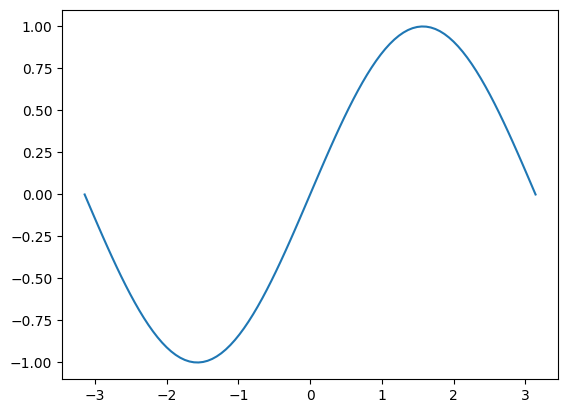

In [23]:
plt.plot(x, y);

f(x) = (y - x) ^ 2

вместо x подставляем наши y_pred

f'(x) = 2 * (x-y)


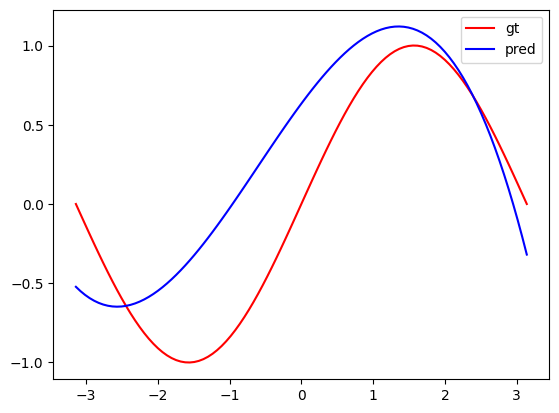

1999 0.21035207102481165
Result: y = 0.6277359457775442 + 0.6143336134421459 x + -0.10597349422825647 x^2 + -0.05906336695845332 x^3


In [25]:
# Randomly initialize weights
a = np.random.random()
b = np.random.random()
c = np.random.random()
d = np.random.random()

# a = 0
# b = 1
# c = 0
# d = -1/6

learning_rate = 1e-6 # a

for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute MSE and print loss
    loss = ((y - y_pred) ** 2).mean()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2 * (y_pred - y)
    grad_a = (grad_y_pred * 1).sum()
    grad_b = (grad_y_pred * x ).sum()
    grad_c = (grad_y_pred * (x ** 2)).sum()
    grad_d = (grad_y_pred * (x ** 3)).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    if t % 100 == 0:
        clear_output(wait=True)
        plt.plot(x, y, color='red', label='gt')
        plt.plot(x, y_pred, color='blue', label='pred')
        plt.legend()
        plt.show()
    # time.sleep(0.1)

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

# NN using numpy matrix multiplication

In [26]:
len(x)

100

In [27]:
np.ones(3)

array([1., 1., 1.])

In [39]:
X = np.stack([np.ones(len(x)), x, x ** 2, x ** 3]) # as features will use x^0, x^1, x^2, x^3 [100; 4]
X = X.T
X.shape

(100, 4)

In [44]:
# Randomly initialize weights
abcd = np.random.random(4)
abcd

array([0.45343004, 0.71747714, 0.98748526, 0.23511651])

In [45]:
(X @ abcd).shape

(100,)

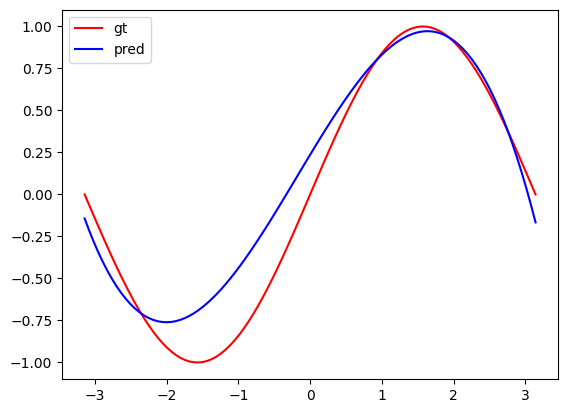

1999 0.04018761294771364
Result: y = 0.2342568753143483 + 0.7088352519686307 x + -0.039374806977699094 x^2 + -0.07225408441585349 x^3


In [46]:
learning_rate = 1e-6

for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = X @ abcd

    # Compute and print loss (Mean Squared Error)
    loss = ((y - y_pred) ** 2).mean()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2 * (y_pred - y) # [100]
    grads = grad_y_pred @ X  # Compute gradients using matrix multiplication

    # Update weights
    abcd -= learning_rate * grads

    if t % 100 == 0:
        clear_output(wait=True)
        plt.plot(x, y, color='red', label='gt')
        plt.plot(x, y_pred, color='blue', label='pred')
        plt.legend()
        plt.show()

print(f'Result: y = {abcd[0]} + {abcd[1]} x + {abcd[2]} x^2 + {abcd[3]} x^3')


# Torch

## Tensor manipulations

In [51]:
x = np.arange(16).reshape(4, 4)
# x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % np.matmul(x, x.transpose(1, 0)))
print("X*X^T  :\n%s" % (x @ x.T))
print("mean over cols :\n%s" % np.mean(x, axis=-1))
print("cumsum of cols :\n%s" % np.cumsum(x, axis=0))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


Torch has a similar syntax

In [52]:
x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over cols :\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


In [53]:
tensor = torch.arange(16).reshape(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([0, 1, 2, 3])
First column: tensor([ 0,  4,  8, 12])
Last column: tensor([ 3,  7, 11, 15])
tensor([[ 0,  0,  2,  3],
        [ 4,  0,  6,  7],
        [ 8,  0, 10, 11],
        [12,  0, 14, 15]])


In [54]:
t = torch.zeros(10)
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([8., 8., 9., 1., 8., 3., 0., 6., 0., 4.])

In [55]:
t.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
t_copy = t.clone()
t_copy.fill_(1)
t_copy

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
t

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
w = torch.Tensor([1, 0, 2, 0])
x = w.clone()

x * w

tensor([1., 0., 4., 0.])

In [59]:
x @ w

tensor(5.)

In [60]:
x.reshape(-1, 1)

tensor([[1.],
        [0.],
        [2.],
        [0.]])

In [61]:
w.reshape(1, -1)

tensor([[1., 0., 2., 0.]])

In [62]:
x.reshape(-1, 1) @ w.reshape(1, -1)

tensor([[1., 0., 2., 0.],
        [0., 0., 0., 0.],
        [2., 0., 4., 0.],
        [0., 0., 0., 0.]])

In [64]:
x_reshaped = x.reshape(-1, 1)
x_reshaped.size()

torch.Size([4, 1])

In [65]:
x_reshaped.shape

torch.Size([4, 1])

In [66]:
x_reshaped.size(0)

4

In [67]:
x_reshaped[2, 0]

tensor(2.)

In [68]:
x_reshaped[[1,3]]

tensor([[0.],
        [0.]])

In [69]:
x_reshaped[[1,3], :]

tensor([[0.],
        [0.]])

In [70]:
a = torch.arange(16).reshape(4, 4)
a.transpose(0, 1)

tensor([[ 0,  4,  8, 12],
        [ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15]])

In [71]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
a.to(device)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [72]:
a_np = a.numpy()
a_np

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### torch.tensor vs torch.Tensor

In [73]:
torch.Tensor()

tensor([])

In [74]:
torch.tensor()

TypeError: tensor() missing 1 required positional arguments: "data"

In [75]:
 torch.Tensor([1, 2, 3]).dtype

torch.float32

In [76]:
torch.tensor([1, 2, 3]).dtype

torch.int64

### view with reshape

In [80]:
z = torch.zeros(3, 2)
x = z.view(2, 3)
z.fill_(1)
x, x.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 torch.Size([2, 3]))

In [100]:
z = torch.zeros(3, 2)
y = z.reshape(6)
x = z.t().reshape((2, 3))
z.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [101]:
y

tensor([1., 1., 1., 1., 1., 1.])

In [102]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

torch.view merely creates a view of the original tensor. The new tensor will always share its data with the original tensor.

torch.reshape doesn't guarantee data sharing. The new tensor may be a view of the original tensor, or it may be a new tensor altogether.

In [103]:
%pip install torchviz -q

In [104]:
from torchviz import make_dot

In [105]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
y = x - 2
z = y.mean()

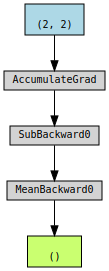

In [106]:
make_dot(z)

In [108]:
print(x.grad)

None


In [109]:
z.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [110]:
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [111]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
y = x - 2
z = y * 3
z = z.mean()

In [112]:
z.backward()
x.grad

tensor([[0.7500, 0.7500],
        [0.7500, 0.7500]])

In [113]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
y = x - 2
z = y * y * 3
z = z.mean()

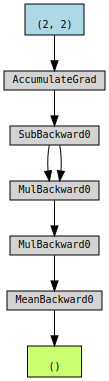

In [114]:
make_dot(z)

In [115]:
y

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)

In [116]:
z.backward()
x.grad

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])

In [119]:
x = torch.ones(5)  # input tensor
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## NN using torch

### Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1769319208.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


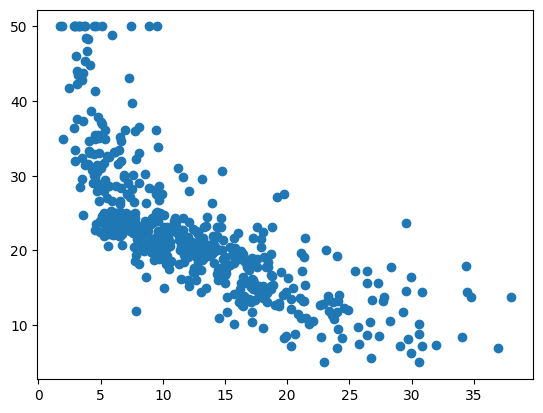

In [122]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
plt.scatter(data[:, -1], target);

In [123]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [133]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [134]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [135]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


dL/dw = 2 x (y_pred - y) x X

dL/db = 2 x (y_pred - y)

In [136]:
(2.0 * (y_pred - y) * x).mean()

tensor(-47.3514, grad_fn=<MeanBackward0>)

In [137]:
(2.0 * (y_pred - y)).mean()

tensor(-45.0656, grad_fn=<MeanBackward0>)

If you compute gradient from multiple losses, the gradients will add up at tensors, therefore it's useful to __zero the gradients__ between iteratons.

In [138]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [139]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-94.7029])
dL/db = 
 tensor([-90.1312])


Sometimes batches are too big to shape into the GPU card. So for stohstic gradient descent you need to accumulate gradients from elements of batch.

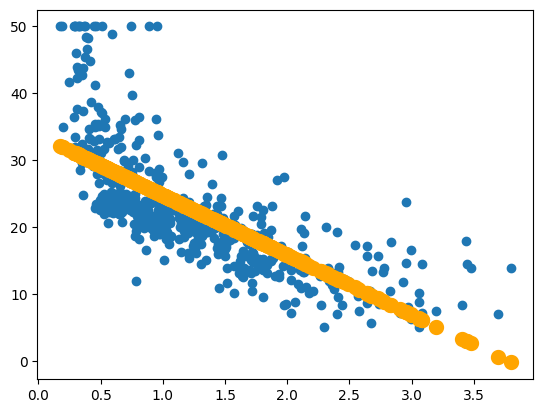

loss =  38.66156


In [140]:
lr = 0.05

for i in range(200):

    y_pred = w * x + b
    loss = ((y_pred - y) ** 2).mean()
    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        # zero gradients
        w.grad.zero_()
        b.grad.zero_()

    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.item() < 0.5:
            print("Done!")
            break

### One more time sin but in torch

In [142]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


In [146]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [144]:
# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

In [145]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor(-1.6141, requires_grad=True)
Parameter containing:
tensor(0.4273, requires_grad=True)
Parameter containing:
tensor(1.3485, requires_grad=True)
Parameter containing:
tensor(1.9696, requires_grad=True)


In [147]:
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 2391.563232421875
199 1678.6756591796875
299 1179.7216796875
399 830.285400390625
499 585.4197387695312
599 413.7359619140625
699 293.298828125
799 208.76922607421875
899 149.41307067871094
999 107.714599609375
1099 78.40839385986328
1199 57.803165435791016
1299 43.31003952026367
1399 33.1122932434082
1499 25.93438148498535
1599 20.880447387695312
1699 17.320859909057617
1799 14.813072204589844
1899 13.045793533325195
1999 11.80004596710205
Result: y = -0.05647985637187958 + 0.8454166054725647 x + 0.009743715636432171 x^2 + -0.0917196199297905 x^3


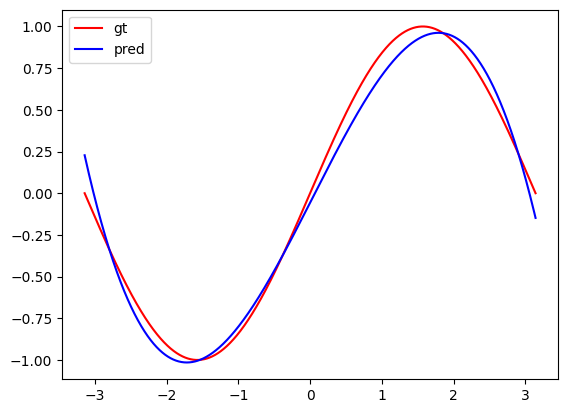

In [148]:
plt.plot(x, y, color='red', label='gt')
plt.plot(x, y_pred.detach().numpy(), color='blue', label='pred')
plt.legend()
plt.show()